### Model:

* $I$ species observed at $J$ locations over time.

* $Y_{tij} = 1$ if species $j$ (for $j=1,\dots,J$) is observed at location $i$ (for $i=1,\dots,I$) at time $t$, and zero otherwise.

* Assume latent factors $X_t \in \mathbb{R}^{I \times K}$; $X_t= X_{tik}$, $i=1,\dots,I$, $k=1,\dots,K$.

* $X_{ti} \in \mathbb{R}^K$ are $K$ latent factors at location $i$. Model assumes that there are some latent factors such as food, water, sunlight etc.

* Logit model:
\begin{equation}
\mathrm{P}(Y_{tij} = 1) = \frac{1}{1+\exp\{-(\alpha + \lambda^\top_j X_{ti})\}},
\quad 
i = 1, \dots, I, ~ j = 1, \dots, J,
\end{equation}
where $\lambda_j \in \mathbb{R}^K$ for $j=1,\dots,J$ are the effects of the latent factors on species $j$ (for example, how much food does a species need, how much water do they need, etc).

* Assume basic auto-regressive model for $X_t$:
\begin{equation*}
X_t = c + \phi X_{t-1} + \varepsilon_t, \quad \varepsilon_t \stackrel{\text{i.i.d.}}{\sim} \mathcal{N}(0,\sigma^2).
\end{equation*}


In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 1000
I = 10  # number of locations
J = 10  # number of species
K = 3  # number of latent factors

In [3]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [4]:
rep = 25

n_particles = 50
logNC = np.zeros(rep)
for r in range(rep) :
    logNC[r] = bootstrap_PF(x_0, n_particles, theta, Y)
print(np.mean(logNC))

n_particles = 100
logNC = np.zeros(rep)
for r in range(rep) :
    logNC[r] = bootstrap_PF(x_0, n_particles, theta, Y)
print(np.mean(logNC))

-71952.60410456249
-69472.38733551376


In [11]:
n_particles = 100
n_mcmc = 100_000
eps = 2e-2
scale = [2*eps*np.eye(np.prod(np.shape(alpha))), 3*eps*np.eye(np.prod(np.shape(lmbda))), 2*eps, 2*eps, 6*eps]

In [ ]:
theta_chain, scale, accept_probs = pMCMC(x_0, Y[0:100], theta, n_particles, n_mcmc, scale, power=1, adapt=False)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


In [28]:
100*np.mean(accept_probs > 0.5)

2.697

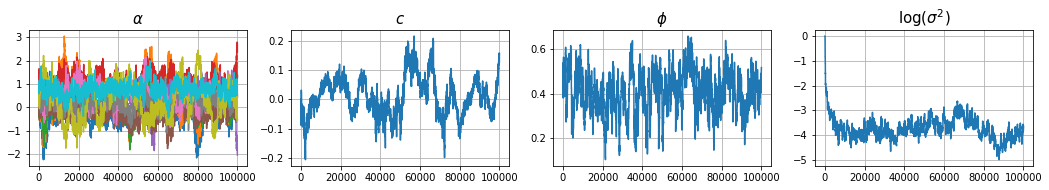

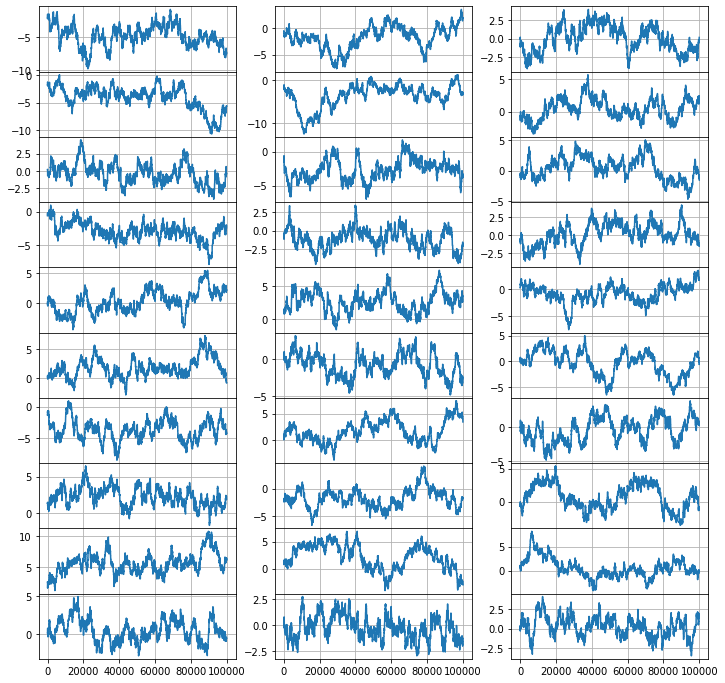

In [15]:
plot_theta_trajectory(theta_chain)

In [17]:
np.shape(theta_chain[0])

(100001, 10)

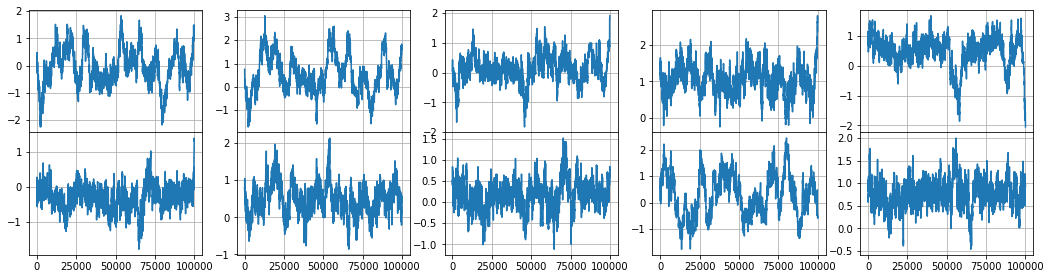

In [24]:
plt.rcParams['figure.figsize'] = (18, 4.5)
for i1 in range(2) :
    for i2 in range(5) :
        idx = 5*i1 + i2  
        plt.subplot(2,5,idx+1)
        plt.plot(theta_chain[0][:,idx])
        plt.grid(True)
        if i1 == 0 : plt.xticks(alpha=0)
        plt.subplots_adjust(hspace=0)

In [ ]:
n_particles = 1000
n_mcmc = 10_000
eps = 2e-2
scale = [2*eps*np.eye(np.prod(np.shape(alpha))), 3*eps*np.eye(np.prod(np.shape(lmbda))), 2*eps, 2*eps, 6*eps]
theta_1, scale_1, accept_probs_1 = pMCMC(x_0, Y[0:100], theta, n_particles, n_mcmc, scale, power=1, adapt=False)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
 61%|██████    | 6120/10000 [3:23:05<5:32:24,  5.14s/it]